In [0]:
import warnings
warnings.filterwarnings('ignore')
from keras_preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

In [225]:
X_train, X_test, X_valid,  Y_train, Y_test, Y_valid = open_fashion_mnist('/content/drive/My Drive/C&AI -- Hometasks/fashion-mnist/data/fashion', 0.2)
print("TRAIN, VALID and TEST shapes", X_train.shape, X_valid.shape, X_test.shape)
img_w, img_h = X_train.shape[1:]

TRAIN, VALID and TEST shapes (48000, 28, 28) (12000, 28, 28) (10000, 28, 28)


In [226]:
num_classes = 10
batch_size = 512
label_dict

{0: "T-shirt'/'top",
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [0]:
Y_train = to_categorical(Y_train, num_classes)
Y_valid = to_categorical(Y_valid, num_classes)
Y_test = to_categorical(Y_test, num_classes)

X_train, input_shape = scale_data(X_train)
X_valid, _ = scale_data(X_valid)
X_test, _ = scale_data(X_test)

In [228]:
model_ = _model(input_shape, num_classes)

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_397 (Conv2D)          (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_398 (Conv2D)          (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_93 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_266 (Dropout)        (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_399 (Conv2D)          (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_400 (Conv2D)          (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_157 (MaxPoolin (None, 14, 14, 64)      

In [229]:
batch_size = 256
gen = ImageDataGenerator(rotation_range = 15, width_shift_range = 0.15, shear_range = 0.01,
                               height_shift_range = 0.15, zoom_range = 0.15)
batches = gen.flow(X_train, Y_train, batch_size = 5 * batch_size)

val_batches = gen.flow(X_valid, Y_valid, batch_size = 5 * batch_size)

earlystopper = EarlyStopping(patience = 5, verbose = 1)
h = model_.fit_generator(batches, steps_per_epoch = X_train.shape[0] // batch_size, epochs = 50,
                    validation_data = val_batches, validation_steps = X_valid.shape[0] //batch_size,
                    callbacks = [earlystopper])

Epoch 1/50
187/187 [==============================] - 77s 414ms/step - loss: 1.3317 - precision_: 0.6210 - recall_: 0.3379 - f1_score: 0.4319 - val_loss: 3.3811 - val_precision_: 0.1531 - val_recall_: 0.1087 - val_f1_score: 0.1271
Epoch 2/50
187/187 [==============================] - 75s 402ms/step - loss: 0.6776 - precision_: 0.8298 - recall_: 0.6433 - f1_score: 0.7242 - val_loss: 1.0208 - val_precision_: 0.7564 - val_recall_: 0.4793 - val_f1_score: 0.5867
Epoch 3/50
187/187 [==============================] - 76s 404ms/step - loss: 0.5083 - precision_: 0.8611 - recall_: 0.7632 - f1_score: 0.8090 - val_loss: 0.4126 - val_precision_: 0.8779 - val_recall_: 0.8173 - val_f1_score: 0.8465
Epoch 4/50
187/187 [==============================] - 75s 400ms/step - loss: 0.4183 - precision_: 0.8829 - recall_: 0.8170 - f1_score: 0.8486 - val_loss: 0.3513 - val_precision_: 0.8946 - val_recall_: 0.8545 - val_f1_score: 0.8741
Epoch 5/50
187/187 [==============================] - 73s 390ms/step - loss:

In [230]:
n_epochs = 50
batch_size = 512
earlystopper = EarlyStopping(patience = 6, verbose = 1)
history = model_.fit(X_train, Y_train,
          batch_size = batch_size,
          epochs = n_epochs,
          verbose = 1,
          callbacks = [earlystopper],
          shuffle = True,
          validation_data = (X_valid, Y_valid))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 9s 178us/step - loss: 0.2372 - precision_: 0.9272 - recall_: 0.9031 - f1_score: 0.9150 - val_loss: 0.2115 - val_precision_: 0.9320 - val_recall_: 0.9201 - val_f1_score: 0.9260
Epoch 2/50
48000/48000 [==============================] - 8s 177us/step - loss: 0.2287 - precision_: 0.9308 - recall_: 0.9082 - f1_score: 0.9194 - val_loss: 0.2055 - val_precision_: 0.9349 - val_recall_: 0.9220 - val_f1_score: 0.9284
Epoch 3/50
48000/48000 [==============================] - 9s 178us/step - loss: 0.2177 - precision_: 0.9327 - recall_: 0.9119 - f1_score: 0.9221 - val_loss: 0.1954 - val_precision_: 0.9362 - val_recall_: 0.9275 - val_f1_score: 0.9318
Epoch 4/50
48000/48000 [==============================] - 9s 178us/step - loss: 0.2075 - precision_: 0.9364 - recall_: 0.9174 - f1_score: 0.9268 - val_loss: 0.1982 - val_precision_: 0.9365 - val_recall_: 0.9272 - val_f1_score: 0.9319
Epoch 5/50
480

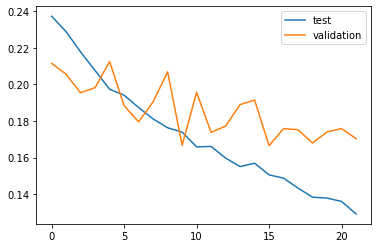

In [231]:
import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history['loss'], label = 'test')
plt.plot(history.epoch, history.history['val_loss'], label = 'validation')
plt.legend()

In [232]:
loss, precision, recall, f1 = model_.evaluate(X_test, Y_test, 
                                              verbose = 1)
print('Test loss:', loss)
print('Test precision:', precision)
print('Test recall:', recall)
print('Test f1_score:', f1)

10000/10000 [==============================] - 2s 165us/step
Test loss: 0.19397917054016142
Test precision: 0.9424972534179688
Test recall: 0.9364017844200134
Test f1_score: 0.939397931098938


In [233]:
loss, precision, recall, f1 = model_.evaluate(X_valid, Y_valid, 
                                              verbose = 1)
print('Validation loss:', loss)
print('Validation precision:', precision)
print('Validation recall:', recall)
print('Validation f1_score:', f1)

12000/12000 [==============================] - 2s 163us/step
Validation loss: 0.17037775226992866
Validation precision: 0.9462593793869019
Validation recall: 0.940500020980835
Validation f1_score: 0.9433261156082153
